## Generated new data set with systematics

In [1]:
from LHEImport.LHEImport import LHEImport as LHEI
from LHEImport.LHEImport2 import read_lhe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(["science", "grid", "high-contrast"])
plt.rcParams.update({"font.family":"serif", "font.size":20, "figure.figsize":[12,8]})

In [ ]:
## uncomment this cell to generate the hdf5 files.
data = LHEI('event_files/lhe/ttZ_events_lhapdf_02.lhe')
data.toHDF5('event_files/hdf5/ttZ_events_02_data', 'particles_limited', limit_events=True)
# data.toHDF5('event_files/hdf5/ttZ_events_02', 'particles', limit_events=False)

In [ ]:
# # generating a big list of all data, can then be imported into a pd.DataFrame
# datalist = []
# for i in range(0, len(Data['eventdata'])):
#     event_particles = Data['eventdata'][i]['final_particles']
#     for particle in event_particles:
#         datalist.append(particle.__dict__)

In [ ]:
# df = pd.DataFrame(datalist)

In [ ]:
df = pd.read_hdf('event_files/hdf5/ttZ_events_02.h5', 'particles_limited')
df.set_index(['event_count', 'barcode'])
# df = pd.read_hdf('event_files/hdf5/ttZ_events_02.h5', 'limit_particles')
# df2 = df.set_index(['index'], ['event_count'])
g = df.groupby('event_count')

pts=[]
for name, group in g: 
    for item in group['pt']:
        item_sum = 0
        item_sum += item**2
        pts.append(item_sum)
plt.hist(pts)
plt.show()

def func(row):
    if abs(row['pdgid'])==6:
        vals.append(row['phi'])
    

## Using scikit-hep/vector testing

In [ ]:
import vector

## Plot of $p_t$, $\phi$, $\eta$ and Energy for each particle.

In [ ]:
fig, axes = plt.subplots(2,2)
for param, ax in zip(["pt", "eta", "phi", "energy" ], axes.flatten()):
    for num in [6,-6,23]:
        particle_string = df[df['pdgid']==num].iloc[0].pdgid_latex
        ax.hist(df[df['pdgid']==num][param], histtype='step', label=f"${particle_string}$", linewidth=2)
#         ax.legend(title="Particle", loc="upper right")
        if param == 'energy':
            ax.title.set_text("Energy")
            ax.set_xlabel('Energy $[$GeV$]$', loc='right', fontsize=18)
        elif param == 'pt':
            ax.title.set_text("Transverse momentum - $p_{\mathrm{T}}$")
            ax.set_xlabel('$p_t$ $[$GeV$]$', loc='right', fontsize=18)
        elif param == 'eta':
            ax.title.set_text("Pseudo-rapidity - $\eta$")
            ax.set_xlabel('$\eta$', loc='right', fontsize=18)
        elif param == 'phi':
            ax.title.set_text("Azimuthal angle - $\phi$")
            ax.set_xlabel('$\phi$', loc='right', fontsize=18)
#         else:
#             ax.title.set_text(f'$\\{param}$')
#             ax.set_xlabel(f'$\\{param}$', loc='right',fontsize=18)
        handles, labels = ax.get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, loc='lower left', fontsize=16, facecolor='white')
plt.savefig("4_hist_ttz.png")
plt.show()

# for num in [6,-6, 23]:
#     particle_string = df[df['pdgid']==num].iloc[0].pdgid_latex
#     plt.hist(df[df['pdgid']==num]['pt'], histtype='step', linewidth=2.6, label=f"${particle_string}$")
#     plt.legend(title="Particle:", loc="upper right")
#     plt.title("Histogram of $p_t$ for $t,\\bar{t},Z$ in $pp \\to t\\bar{t}Z$")
#     plt.xlabel("$p_t$ $[$GeV$]$")
# plt.savefig('pt_ttZ_histo.png')
# plt.show()

## Additional plots
Require plots of: 
- $p_t$ of the total system
- $\delta \phi$ between the tops

Have to do calculations that depend on events. 

Firstly need a way to put the data into a dataframe. 

For p_t one way to idenfity would be to sum p_t for all particles where parent != 0. Parent = 0 implies intial state particle. 

For delta phi, extract the four vecs for particles where abs(pdgid)==6

In [ ]:
##doing this to keep the following operations from messing everything up

df2 = df

In [ ]:
delta_phi=[]
for name, group in df2.groupby('event_count'):
    t_vecs=[]
    for row_index, row in group.iterrows():
        if abs(row.pdgid)==6:
            t_vecs.append(vector.obj(pt=row['pt'], phi=row['phi'], eta=row['eta'], E=row['energy']))
    delta_phi.append(t_vecs[0].deltaphi(t_vecs[1]))
for i in range(0, len(delta_phi)+1):
    df2.loc[(df2['event_count']==i)]['deltaphi'] = 12
    
plt.hist(delta_phi, bins=50)
df2

In [ ]:
# df = pd.read_hdf('event_files/hdf5/ttZ_events_02_data.h5', 'particles_limited')

In [ ]:
# df.head()

In [133]:
data = read_lhe('event_files/lhe/ttZ_events_lhapdf_02.lhe')

In [134]:
events = [e for e in data]
objects = [o for o in events]
event_info = [x.eventinfo for x in objects]
particles = [x.particles for x in objects]

In [158]:
d = {{'Event Info': e.__dict for e in event_info}

SyntaxError: unexpected EOF while parsing (1732738820.py, line 1)

In [159]:
pt_all = []
for o in obj:
    pts=[]
    for particle in o.particles:
        pts.append(particle.pt)
    for pt in pts: 
        total = 0
        total += pt**2
        total = np.sqrt(total)
    pt_all.append(total)
            
counts, bins = np.histogram(pt_all)
print(counts)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('pt all final state particles')
plt.show()
            
    why am i doing this
        

IndentationError: unexpected indent (3060096598.py, line 18)

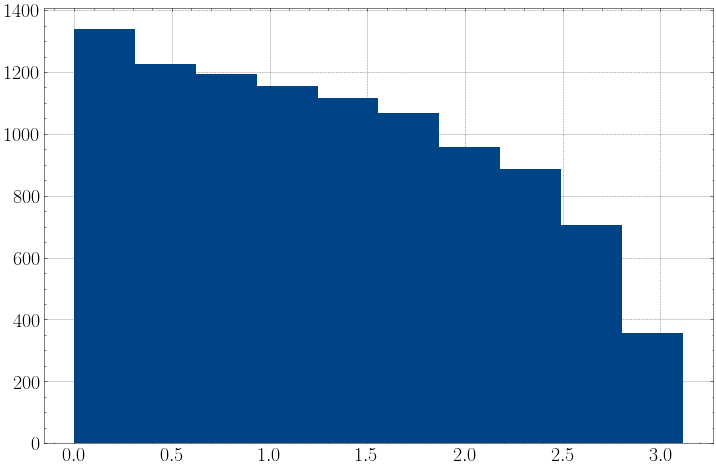

In [26]:
deltaphi_all = []
weights=[]
for o in obj: 
    phis = []
    for particle in o.particles:
        if particle.m == 173.0:
            phis.append(particle.phi)
    deltaphi_all.append(abs(phis[0] - phis[1]))
    weights.append(o.eventinfo.weight)
counts, bins = np.histogram(deltaphi_all)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

In [ ]:

print(obj[0].particles[0])